# My Project 

![pictue](data/film-production.jpg)
Photo was obtained [here](https://academy.wedio.com/filmmaking)

## Business Undestanding
### a) Introduction
Film production began in 1900 by [Charles Pathé](https://en.wikipedia.org/wiki/Charles_Path%C3%A9), he had the largest filming company until the start of World War I. In Pittsburgh(United States) 1905, "The Nickelodeon" was the first film theatre to be introduced, and from 1906 onwards film production and theaters increased till the 20th centuary. If you're intrested in the history of the filming industry here is the [link](https://en.wikipedia.org/wiki/Film_industry)
Movies usually generate revenue from the following sources ;
- Merchandising
- Television Broadcats
- Home video
- Theatre Exhibitions.

However out of all these sources theatre exhibitions is the most used measure to asses the  the success of a movie because data is available compared to the other sources.
Movies are usually categorised according to the style, theme or scenes associated with the movie, such categories are called **genres**, few examples of movie genres are **Actio, Thriller, Drama, Horror and Comedy**.  

### b) Problem Statement


### c) Main Problem
Our main problem is to identify the most profitable movie production line / channel , considering movie category / genre, that yield high profits at low production costs. We will aslo be investigating other factors that contribute to high theatre movie sales 

### d) Metric for Success
Will be to comming up with a potential movie category to venture into.


### e) Specific Objectives
The main business problem can be split into the following business qusetions / objective that will quid in solving the main problem;

>- Who are the top professionals ( Producers, Actors, Directors) who can be  considered for hire, and are linked to the most rated and high grossed movies

>- Which are the movie genres that lead to high gross domestic and foreign gross income that Microsoft studio should specialise in production  

>- Which is/are the top movie production studios that have a high movie ratings and movie gross incomes that Microsoft studio could partner with in production


In this project we are going to determine the most profitable movie venture interms of the movie category(**Movies or Tv Shows**) and the associated **genres** and other combinations that will have high Movie's Gross income. 


## Data Understanding

The datasets used in this project were sourced from various movie databases and website such as [TheMovieDB](https://www.themoviedb.org/) , [IMDB](https://www.imdb.com/) and [Rotten Tomatoes](https://www.rottentomatoes.com/) and they conatin various attributes of intrests such as movie: ***titles, gross sales, production studios, year of production and production crews*** .  
The datasets that have been used are;
> The `bom.movie_gross.csv`, where each row represents a particular movie and its corresponding attribute. The data set contains 3387: movies and 5: movie atributes which include; `title`, `studio`, `domestic_gross`, `foreign_gross` and `year`.

> The `im.db` is SQLite database of IMDB data, that contain diferent tables that are link together using primary and foreign keys. Each table contains different movie attributes corresponding to particular movie titles  found in the `movie_basics` table. 

Below is the IMDB movie database Entity Relational Diagram(ERD) showing how the different tables are linked.
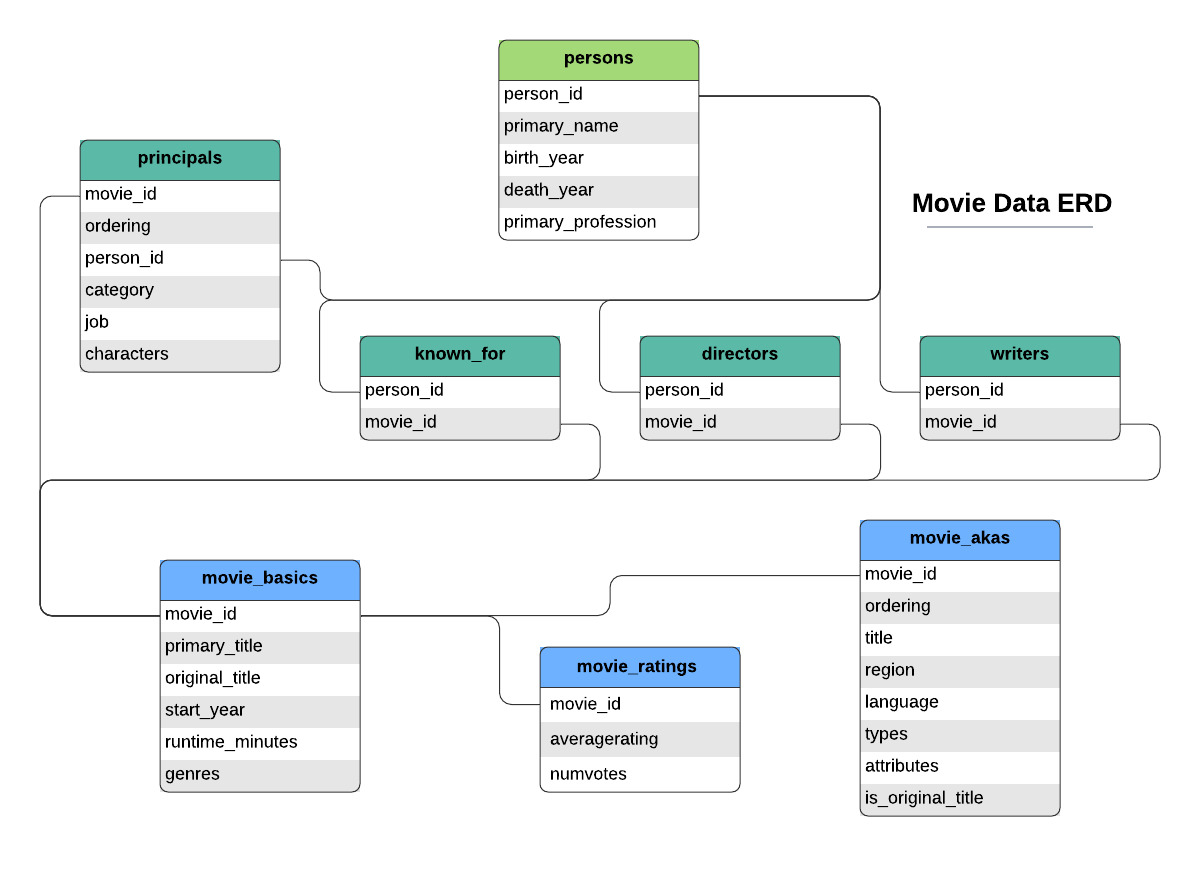

From this database we are going to create two tables with only the requred attrubutes:

 `movie_basics` table, which is a join of the `movie_basics` and `movie_ratings` tables and will have the following attributes {`movie_id`, `runtime_minute`, `primary_title`, `genres`, `averagerating`, `numvote`}
and

`persons` table which is a join of the  `persons` and `principlas` tables inorder to have the following attributes {`movie_id`, `person_id` , `person_name`, `primary_professeion`, `odering`, `category`, `job`}


## Data Preparation

Here we are goin to extract the various table that are going to answer the bussiness question and undertake data cleaning to prepair them for analysis. The various data cleaning methods that to be used will be;
- Checking and removing duplicates
- Dealing with missing data
- Checkin and dealing with missing data in form of place holders

Other data cleaning techniques like droping unwanted rows, grouping data and pivot tables are going to be undertaken during data analysis at specific business problems


In [2]:
#importing all the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

#creating an SQLite server connection to the im.db databsaeb
conn=sqlite3.connect('data/im.db')


### The `bom.movie_gross.csv` Dataset
First we will start with the data preparation with the `bom.movie_gross.csv` dataset, where we read it as `movie_gross` dataframe and check for missing values, duplicates and placeholders.

In [3]:
# Reading the `bom.movie_gross dataset` as `movie_gross` dataframe

movie_gross=pd.read_csv('data/bom.movie_gross.csv')
print(movie_gross.shape)
movie_gross.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Checking for duplicates

print(movie_gross.duplicated().sum())
movie_gross[movie_gross.duplicated()]

#there are no duplicates

0


,title,studio,domestic_gross,foreign_gross,year


In [5]:
#hecking for missing data
print(movie_gross.info())

movie_gross.isna().sum()/len(movie_gross)

# domestic_gross column has 28 missing values corresponding to 0.8%
# foreign_gross column has 1350 missing values which corresponds to 40% of the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


title             0.000000
studio            0.001476
domestic_gross    0.008267
foreign_gross     0.398583
year              0.000000
dtype: float64

In [6]:
# Dealing with the missing values, by droping the missing values in both `domestic_gross` and `foreign_gross` columns

#Droping rows with missing data in the `foreign_gross` and `domestic_gross` columns
movie_gross.dropna( inplace=True)

In [7]:
#converting the foreign_gross column into float dtype  by removing the ',' characters and coersing to float
movie_gross.foreign_gross = movie_gross.foreign_gross.map( lambda x: float(x.replace(',','')))

#confirming the above steps
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [8]:
#we create a new coulmn called gross = domestic_gross + foreign_gross

movie_gross['gross']=movie_gross.domestic_gross + movie_gross.foreign_gross

# dropping the old columns
movie_gross.drop(['domestic_gross','foreign_gross'], axis=1, inplace= True)


In [9]:
#checking for extraneous values (missing data represented by placeholders) from all the columns of our movie_gross dataset
# exept title column

for col in movie_gross.columns[1:]:
    print(col, '\n', movie_gross[col].value_counts(normalize=True).head(), '\n\n')
    
    
# there are no missing data represented by placeholders

studio 
 Uni.    0.071749
Fox     0.066766
WB      0.064773
Sony    0.052317
BV      0.051819
Name: studio, dtype: float64 


year 
 2010    0.153463
2011    0.144494
2012    0.121076
2014    0.116592
2013    0.099651
Name: year, dtype: float64 


gross 
 27400000.0    0.002491
7900000.0     0.002491
16900000.0    0.002491
15400000.0    0.002491
7500000.0     0.001993
Name: gross, dtype: float64 




In [10]:
# Examining the various descriptive statistics of the movie_gross dataset
movie_gross.describe()

,year,gross
count,2007.000000,2.007000e+03
mean,2013.506228,1.228102e+08
std,2.597997,2.075562e+08
min,2010.000000,4.900000e+03
25%,2011.000000,8.239000e+06
50%,2013.000000,4.240000e+07
75%,2016.000000,1.337500e+08
max,2018.000000,1.518900e+09


> The `gross` column has a **mean**: 122,810,200 , **Standar deviation**:207,556,200 and a **median**:42,400,000, which suggest presence of positive skewness


### The `im.db`  Database
Next, we are going to extract the required attributes and tables from the `im.db` database and prepair them for analysis. 
The fisrt table to extract will be the `movie_basics` table that contains the required movie attributes like; `primary_title`, `runtime_minute` , `genres` and `movie_id`.

In [11]:
#Writing an sql query to extract the movie_basics table

q=""" 
SELECT 
        movie_id,
        primary_title, 
        runtime_minutes,
        genres
FROM movie_basics        
;
"""
movie_basics=pd.read_sql(q,conn) 
print(movie_basics.shape)
movie_basics.head()                


(146144, 4)


,movie_id,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [12]:
#checking the structure of the table's columns 
movie_basics.info()

#The all columns are of required dtype 
#The runtime_minutes column have missing values
# since it is not a major varibles in our analysis we will leave it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   runtime_minutes  114405 non-null  float64
 3   genres           140736 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.5+ MB


The second table to extract will be called `persons` that will contain information about different filming professions i.e (actors, producers, writers and actresses) and their corresponding attributes such as their; **name, category, movie produced and primary profession***.

The table will be an <span style='color:red'>  inner </span> join of the `persons` table and the `principals` table so as to get only the persons we have full information of from the two tables. This joining is a <span style='color:red'> one - to - many  </span>  relationship since one profession can be linked to several movie titles.


In [13]:
#writting the  sql query for creating the persons table
q="""
SELECT 
        p.primary_name,
        p.person_id,
        pp.movie_id,                   
        pp.category
FROM persons AS p
INNER JOIN principals AS pp   ---Using inner joint so as to get persons who we have full details on
        USING(person_id)

WHERE p.death_year IS NULL     -- selecting only the professionals that are alive     

;
"""

persons=pd.read_sql(q,conn)
print(persons.shape)
persons.head()



(1016069, 4)


,primary_name,person_id,movie_id,category
0,Mary Ellen Bauder,nm0061671,tt2398241,producer
1,Joseph Bauer,nm0061865,tt0433397,composer
2,Joseph Bauer,nm0061865,tt1681372,composer
3,Joseph Bauer,nm0061865,tt2281215,composer
4,Joseph Bauer,nm0061865,tt2387710,composer


In [14]:
#checking for missing values
print(persons.isna().sum())
persons.info()

#the variables ar of required data type


primary_name    0
person_id       0
movie_id        0
category        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016069 entries, 0 to 1016068
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   primary_name  1016069 non-null  object
 1   person_id     1016069 non-null  object
 2   movie_id      1016069 non-null  object
 3   category      1016069 non-null  object
dtypes: object(4)
memory usage: 31.0+ MB


In [15]:
#checking the category of professionals our data has 
persons.category.unique()

array(['producer', 'composer', 'actor', 'cinematographer',
       'production_designer', 'director', 'actress', 'writer', 'editor',
       'self', 'archive_footage', 'archive_sound'], dtype=object)

## Data Analysis

